# Семинар 2

## Что мы сегодня узнаем?

* Как работает метод ближайших соседей, какие у него есть параметры и на что они влияют.
* Узнаем про метрики классификации.

## Как работает k-NN?

Начнем с введения некоторых определений и обозначений.

* Пусть $x \in X$ — вектор признаков (или атрибутов) объекта.
* Под $y$ мы будем подразумевать значение, которое мы хотим научиться предсказывать. Оно может быть числом (тогда говорят о *задаче регрессии*) или элементом конечного множества (*классом* или *меткой*, тогда говорят о *задаче классификации*). Например, предсказать выручку магазина по его месторасположению — это задача регрессии, а определить, болен человек некоторой конкретной болезнью или нет — задача классификации.

k-NN входит в число **supervised** алгоритмов или алгоритмов «обучения с учителем».
Это означает, что нам предоставляется набор данных $(x_1, y_1), \ldots, (x_n, y_n)$, в котором приведены признаки и верные ответы для $n$ каких-то объектов. Целью является на основе предоставляемой выборки найти связь между $x$ и $y$, то есть восстановить функцию $h: X \rightarrow Y$. Имея такую функцию, мы можем предсказать $y$ по имеющемуся наблюдению $x$.

Для нового объекта с вектором признаков $x_{new}$ алгоритм k-NN находит $k$ ближайших к $x_{new}$ точек среди $x_1, \ldots, x_n$. Пусть они имеют индексы $i_1, \ldots, i_k$. Для задачи регрессии в качестве $h(x)$ используется среднее соответствующих значений $y$, то есть

$$h(x)=\frac{1}{k}\sum_{i=1}^k y_{i_k}.$$

Для задачи классификации в качестве $h(x)$ используется то значение $y$, которое встречается среди $y_{i_1}, \ldots, y_{i_k}$ чаще всего (если таких значений несколько, выбирается какое-то одно из них — например, самое маленькое для какого-то порядка на классах).

## Реализация k-NN своими руками

In [37]:
import numpy as np

In [82]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
# пусть это обучающая выборка
x_train = np.array([[1, 1], [0, 0], [0, 1]])

# а это пример, который мы должны классифицировать
x_new = np.array([0, 1])

In [57]:
x_train - x_new

array([[ 1,  0],
       [ 0, -1],
       [ 0,  0]])

In [54]:
# считаем норму (длину фактически здесь) вектора а
def euclidean_norm(a):
    return np.sqrt(np.sum(a**2, axis=1))

* находим расстояния до элементов x_train;
* в качестве расстояния используется евклидова норма разности векторов

In [55]:
distances = euclidean_norm(x_train - x_new)
distances

array([1., 1., 0.])

сортируем по возрастанию, т.е. первый элемент массива -- индекс ближайшего элемента к x_new

In [58]:
np.argsort(distances)

array([2, 0, 1])

# Task 1

Напишите классификатор knn

In [101]:
# это вспомогательная функция
def most_common(y):
    """
    функция принимает на вход вектор из элементов
    и возвращает самый часто встречающийся в векторе элемент
    """
    y_=list(y)
    return max(y_, key=y_.count)

In [ ]:
def kNN_classification(x_train, y_train, x_new, k=1):
    """
    x_train is np.array with shape (n, d) (matrix with n rows, d columns)
    y_train is np.array with shape (n, ) (1-dimensional array with n elements)
    x_new is np.array with shape (d,) (1-dimensional array with d elements)
    """
    distances = # твой код тут # (つ▀¯▀)つ
    # вычислить расстояние между каждой строкой x_train и x_new
    # x_train - x_new создаёт новую матрицу, получаемую 
    # вычитанием x_new из каждой строки x_train в силу broadcasting rules
    # x_new broadcast'ится из shape (d,) до shape (n, d) путём повторения
    
    sorted_idxs = # твой код тут # (つ▀¯▀)つ
    # np.argsort(distances) возвращает индексы вектора distances 
    # в порядке возрастания элементов; воспользуйтесь ею.
    
    predictions = # твой код тут # (つ▀¯▀)つ
    # нужно выбрать k элементов-индексов из sorted_idxs,
    # а затем воспользоваться y_train, чтобы увидеть какие метки у элементов с такими индексами
    # нужно вернуть предсказание, соответствующее самой частотной метке
    
    return predictions

Протестируем полученный классификатор на искуственных данных

In [122]:
from sklearn.datasets import make_blobs, make_circles

In [150]:
# X, y = make_blobs(n_samples=800, centers=2, random_state=170, cluster_std=1.5)
X, y = make_circles(n_samples=800, random_state=170, noise=0.10, factor=0.6)

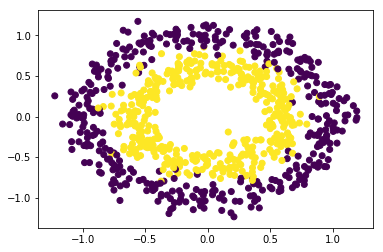

In [151]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

Делим выборку на 2 части -- на одной хотим обучится, на другой сделать предсказание

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

Обучаемся на train, предсказываем на test

In [153]:
predictions = [kNN_classification(X_train, y_train, x_new, k=4) for x_new in X_test]

Попробуем подсветить цветом элементы, которые были неверно классифицированы

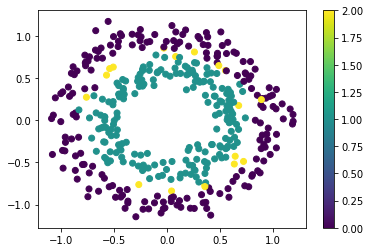

In [154]:
colors = []
for y_,pred in zip(y_test, predictions):
    if y_!=pred:
        colors.append(2)
    else:
        colors.append(pred)
plt.scatter(X_test[:,0], X_test[:,1],c=colors)
plt.colorbar()
plt.show()

# Task 2

Измените что-то в вашей функции, чтобы получился knn regressor

In [ ]:
def kNN_regression(x_train, y_train, x_new, k=1):
    """
    x_train is np.array with shape (n, d) (matrix with n rows, d columns)
    y_train is np.array with shape (n, ) (1-dimensional array with n elements)
    x_new is np.array with shape (d,) (1-dimensional array with d elements)
    """
    distances = # твой код тут # (つ▀¯▀)つ
    # вычислить расстояние между каждой строкой x_train и x_new
    # x_train - x_new создаёт новую матрицу, получаемую 
    # вычитанием x_new из каждой строки x_train в силу broadcasting rules
    # x_new broadcast'ится из shape (d,) до shape (n, d) путём повторения
    
    sorted_idxs = # твой код тут # (つ▀¯▀)つ
    # np.argsort(distances) возвращает индексы вектора distances 
    # в порядке возрастания элементов; воспользуйтесь ею.
    
    predictions = # твой код тут # (つ▀¯▀)つ
    # нужно выбрать k элементов-индексов из sorted_idxs,
    # а затем воспользоваться y_train, чтобы увидеть какие метки у элементов с такими индексами
    # нужно вернуть предсказание, соответствующее самой частотной метке
    
    return predictions

Проверяем

In [191]:
# Просто функции для генерации данных
def f(x):
    return x ** 2

def make_data(n, eps0):

    X = np.random.uniform(low=-1, high=1, size=(n, 1))
    eps = np.random.normal(scale=eps0, size=(n, 1))

    Y = (f(X) + eps)[:, 0]
    # чтобы Y был одномерным, выбрали первый (он же единственный) столбец
    # с помощью [:, 0]
    
    return X, Y

In [192]:
X,y = make_data(200, eps0=0.1)

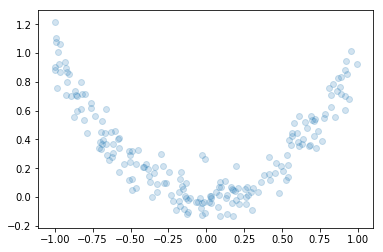

In [193]:
plt.scatter(X, y, alpha=0.2)
plt.show()

Обучаемся и предсказываем значения по равномерной сетке x_grid

In [194]:
x_grid = np.linspace(-1, 1, 200)

In [201]:
predictions = [kNN_regression(X, y, x_new, k=30) for x_new in x_grid]

In [ ]:
plt.scatter(X, y, alpha=0.2, label='data')
plt.plot(x_grid, predictions, c='tomato', label='predictions')
plt.legend()
plt.show()

# Использование k-NN из sklearn

In [226]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(data_home='./data/',
                              download_if_missing=False,
                              min_faces_per_person=30, resize=0.3) # эту строчку менять нельзя, ресайзить нельзя

In [227]:
X = lfw_people.data
y = lfw_people.target

In [228]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [229]:
X.shape

(2370, 1036)

In [230]:
# размер картинок
lfw_people['images'][4].shape

(37, 28)

In [274]:
def show_class_image(class_id, return_image=False):
    images = lfw_people.images[lfw_people.target==class_id]
    image_show = images[np.random.randint(len(images))]
    plt.imshow(255 - image_show, cmap=plt.cm.gray_r, interpolation='nearest')
    if return_image:
        return image_show

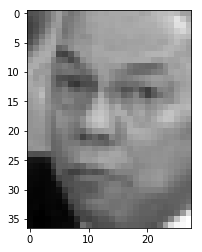

In [264]:
show_class_image(5)

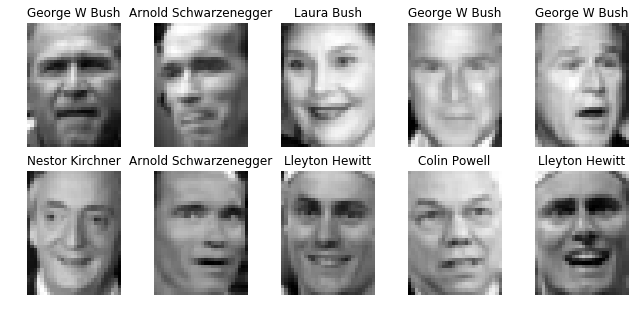

In [266]:
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(lfw_people['target_names'][y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(11, 5)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)

## Task 3

Посмотрите какое значение $y$ чаще всего встречается в датасете (можно построить график, а можно и не строить)

In [ ]:
# твой код тут # (つ▀¯▀)つ

Обрежем датасет, чтобы делать классификацию на 2 класса

# Task 5

Создайте подвыборку (`X_small`, `y_small`) из датасета (`X`,`y`), так что в датасете (`X_small`, `y_small`) останутся только объекты с метками 2х самых представленных классов, которые мы уже нашли в предыдущей части.

In [ ]:

X_small = # твой код тут # (つ▀¯▀)つ
y_small = # твой код тут # (つ▀¯▀)つ
print('размерность урезанного X:', X_small.shape)
print('размерность урезанного y:', len(y_small))

## Делим выборку на train/test

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.4, stratify=y_small)

Импортируем классификатор из sklearn

In [235]:
from sklearn.neighbors import KNeighborsClassifier

Создаем объект класса

In [236]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

Обучаемся на train

In [237]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Тестируем обученный алгоритм на нетронутой части:

In [238]:
predictions = knn.predict(X_test)

Как теперь быстро понять, насколько все хорошо или плохо?

# Метрики классификации

In [239]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Task 6

Напишите функцию для подсчета `accuracy`

In [ ]:
def accuracy(a,b):
    result = # твой код тут # (つ▀¯▀)つ
    return result

In [79]:
# check
result = accuracy(predictions, y_test)
assert np.isreal(result) # смотрим, чтобы это был какой-то float
assert result == accuracy_score(predictions, y_test) # проверяем, что библиотечная реализация выдает то же

In [ ]:
accuracy(predictions, y_test)

Но действительно ли у нас все так хорошо...?

Давайте посмотрим еще раз на баланс классов в тестовой выборке

In [ ]:
plt.hist(y_test)
plt.show()

# Task 7

In [213]:
# посчитайте accuracy, если всегда предсказывать 8
# твой код тут # (つ▀¯▀)つ

# Precision, Recall

<img src="Precisionrecall.png">

### Для класса 5

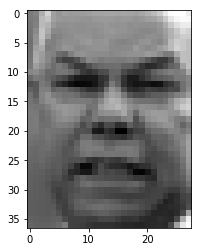

In [276]:
show_class_image(5)

In [246]:
precision_score(y_test, predictions, average="binary", pos_label=5)

0.788235294117647

In [249]:
recall_score(y_test, predictions, average="binary", pos_label=5)

0.7052631578947368

### Для класса 8

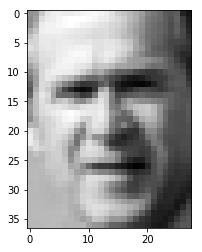

In [279]:
show_class_image(8)

In [247]:
precision_score(y_test, predictions, average="binary", pos_label=8)

0.8738738738738738

In [248]:
recall_score(y_test, predictions, average="binary", pos_label=8)

0.9150943396226415

# Confusion matrix

Способ понять количественно какой класс был предсказан вместо какого другого класса

In [280]:
from sklearn.metrics import confusion_matrix

In [283]:
confusion_matrix(y_test, predictions, labels=[8,5])

array([[194,  18],
       [ 28,  67]])